# Exploratory Data Analysis (EDA) of the Titanic dataset

Data source: https://www.kaggle.com/c/titanic

Goal of this excercise is to try to solve series of tasks which are very similar to the tasks you will face during working on the first (EDA) project in SU.

The idea is that you will take a look at the dataset which you have, probably, no prior knowledge and try to form a few hypotheses (de facto circa 5 questions) about the data and you will try to find an answers to them. 

**It is mandatory to write down your gained insight about each of the hypotheses in your notebook!**

#### Data Dictionary

|Variable|Definition|Key|
|:-------|:-------|:--------|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Import used packages

In [1]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## Load the data into the Pandas DataFrame - in our case it is a csv file

In [2]:
df = pd.read_csv('titanic.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Task 1
**Description:** What percentage of passangers survived in different pclass?

First we need to calculate number of passengers for pclass and survived category.

In [23]:
agg_pclass_survived = df.groupby(['Pclass', 'Survived']).PassengerId.count()
agg_pclass_survived

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

To calculate percentage ration of survivors in different class we need to calculate total for each class before calculation.

For example for first row we would calculate percentage on paper by calculcation $\frac{80}{80+136} = \frac{80}{216} = 0.370$

In [24]:
agg_pclass = df.groupby('Pclass').PassengerId.count()
agg_pclass

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

We let previous variables as type pandas.Series, which include index (first row, indetifier). We can use this index for mathematical calculations :-). Position with matching index will be used for calculation.

In [25]:
agg_pclass_survived / agg_pclass

Pclass  Survived
1       0           0.370370
        1           0.629630
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: PassengerId, dtype: float64

In [26]:
df_agg = (agg_pclass_survived / agg_pclass).reset_index(name='Ratio')
df_agg

,Pclass,Survived,Ratio
0,1,0,0.370370
1,1,1,0.629630
2,2,0,0.527174
3,2,1,0.472826
4,3,0,0.757637
5,3,1,0.242363


Lets visualize our result using seaborn.barplot

<AxesSubplot: xlabel='Pclass', ylabel='Ratio'>

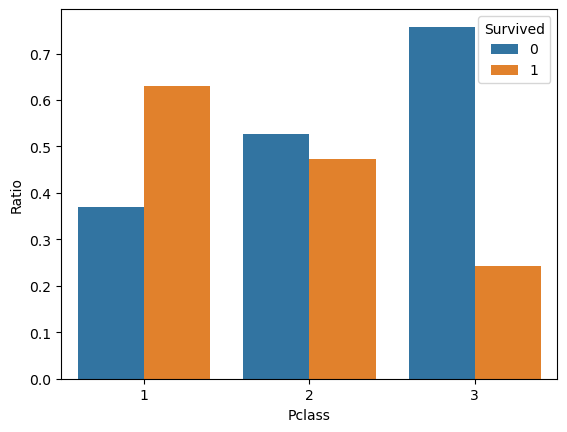

In [27]:
sns.barplot(data=df_agg, x='Pclass', y='Ratio', hue='Survived')

We can notice that higher percentage of survived is in 1st class - over 60%.

**Better visualization can be done in form of stacked bar plot. However, there is no easy way to do this in seaborn. Following is small example from internet for stacked bar plot using Matplotlib.**

<BarContainer object of 3 artists>

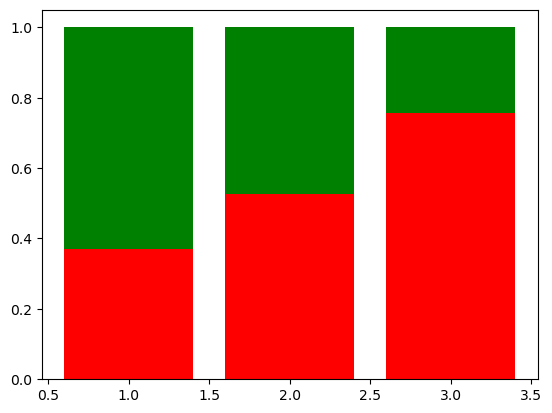

In [28]:
df_sur0 = df_agg[df_agg.Survived==0]
df_sur1 = df_agg[df_agg.Survived==1]
plt.bar(df_sur0.Pclass, df_sur0.Ratio, color='red')
plt.bar(df_sur1.Pclass, df_sur1.Ratio, color='green', bottom=df_sur0.Ratio)

Higher chance for survival had passangers from 1st class.

## Task 2
**Description:** Is there any effect caused by sex on ticket class?

**Insight gained:** While majority of people embarked are men, it seems the major difference is in the 3rd ticket class. In the second and first class, still, theres's more men but the visible difference is significantly smaller. We can draw a conclusion from this, that women are more likely than men to travel in a higher ticket classes while men tend to be in a lower classes

In [42]:
df_agg = df.groupby(['Pclass', 'Sex']).PassengerId.count().reset_index(name='PassengerCount')
df_agg

,Pclass,Sex,PassengerCount
0,1,female,94
1,1,male,122
2,2,female,76
3,2,male,108
4,3,female,144
5,3,male,347


<AxesSubplot: xlabel='Sex', ylabel='count'>

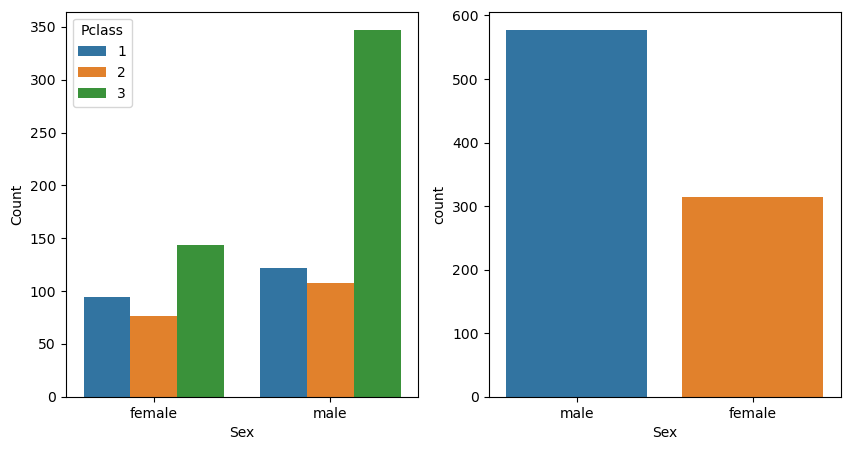

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
rdf_agg = df.groupby(['Pclass', 'Sex']).PassengerId.count().reset_index(name='Count')
sns.barplot(data=rdf_agg, x='Sex', y='Count', hue='Pclass', ax=axes[0])
sns.countplot(data=df, x='Sex', ax=axes[1])

In [5]:
agg_pclass = df.groupby('Pclass').PassengerId.count()
agg_pclass

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [6]:
df_agg = df.groupby(['Pclass', 'Sex']).PassengerId.count()
df_agg

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: PassengerId, dtype: int64

In [7]:
df_agg / agg_pclass
dfdf = (df_agg / agg_pclass).reset_index(name='Ratio')
dfdf

,Pclass,Sex,Ratio
0,1,female,0.435185
1,1,male,0.564815
2,2,female,0.413043
3,2,male,0.586957
4,3,female,0.293279
5,3,male,0.706721


<AxesSubplot: xlabel='Sex', ylabel='Ratio'>

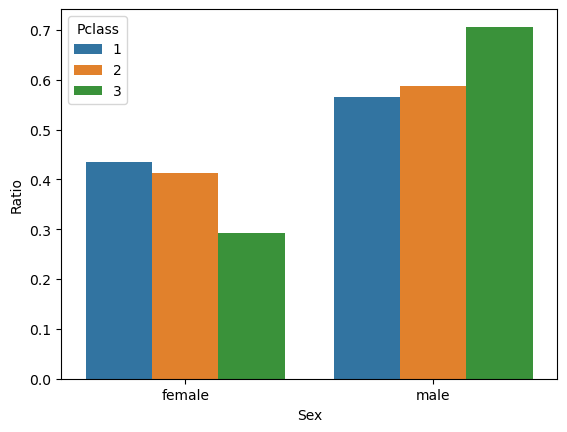

In [8]:
sns.barplot(data=dfdf, x='Sex', y='Ratio', hue='Pclass')

## Task 3
**Description:** How many whole families survived?
 
**Insight gained:** When counting members of a same family when there's more than 1 member of a family, we see that only 18 whole families survived and 184 did not make it.
That is, approx. 91% families lost at least one member of their family.


In [15]:
def extract_last_name(nm):
    return nm.split(',')[0].strip()

In [16]:
df['LastName'] = df.Name.apply(extract_last_name)
df['FamilySize'] = df.Parch + df.SibSp + 1

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,1


In [18]:
df_agg = df[df.FamilySize > 1].groupby(['LastName', 'FamilySize']).Survived.sum().reset_index(name='MembersSurvived')
df_agg.sort_values(by=['MembersSurvived', 'LastName'], axis=0, ascending=False).head()

,LastName,FamilySize,MembersSurvived
32,Carter,4,4
15,Baclini,4,4
101,Johnson,3,3
83,Harper,2,3
11,Asplund,7,3


In [19]:
df_agg['FamilySurvived'] = df_agg.FamilySize == df_agg.MembersSurvived

In [20]:
df_agg.sort_values(by=['MembersSurvived', 'LastName'], axis=0, ascending=False).head()

,LastName,FamilySize,MembersSurvived,FamilySurvived
32,Carter,4,4,True
15,Baclini,4,4,True
101,Johnson,3,3,True
83,Harper,2,3,False
11,Asplund,7,3,False


In [21]:
df_agg2 = df_agg.groupby('FamilySurvived').FamilySurvived.count()
df_agg2 = (df_agg2 / len(df_agg.index)).reset_index(name='ratio')



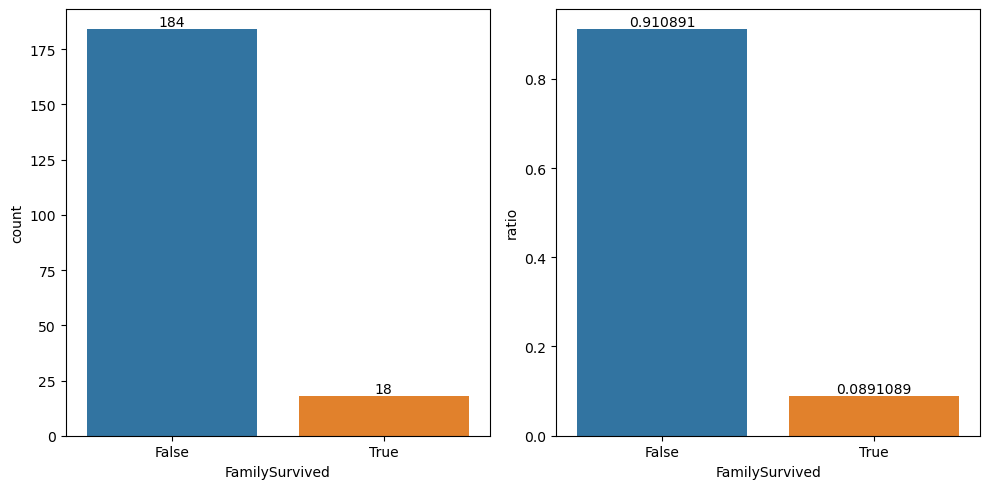

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = sns.countplot(data=df_agg, x='FamilySurvived', ax=fig.axes[0])

for i in ax.containers:
    ax.bar_label(i, )
# plt.show()
ax = sns.barplot(data=df_agg2, x='FamilySurvived', y='ratio', ax=fig.axes[1])        
for i in ax.containers:
    ax.bar_label(i, )
fig.tight_layout()



## Task 4
**Description:** Is there any effect caused by family size on ticker fare?

**Insight gained:** As there are not many big families, we see that a lot of people got onto the ship alone. Those people also have the minimum median value of a ticket fare. Then the trend seems to up ascending, meaning, the bigger the family, the costlier the ticket to get on board. Which may seem a bit counterintuitive. This effect may be caused by that, the families choose higher Pclass than singles 

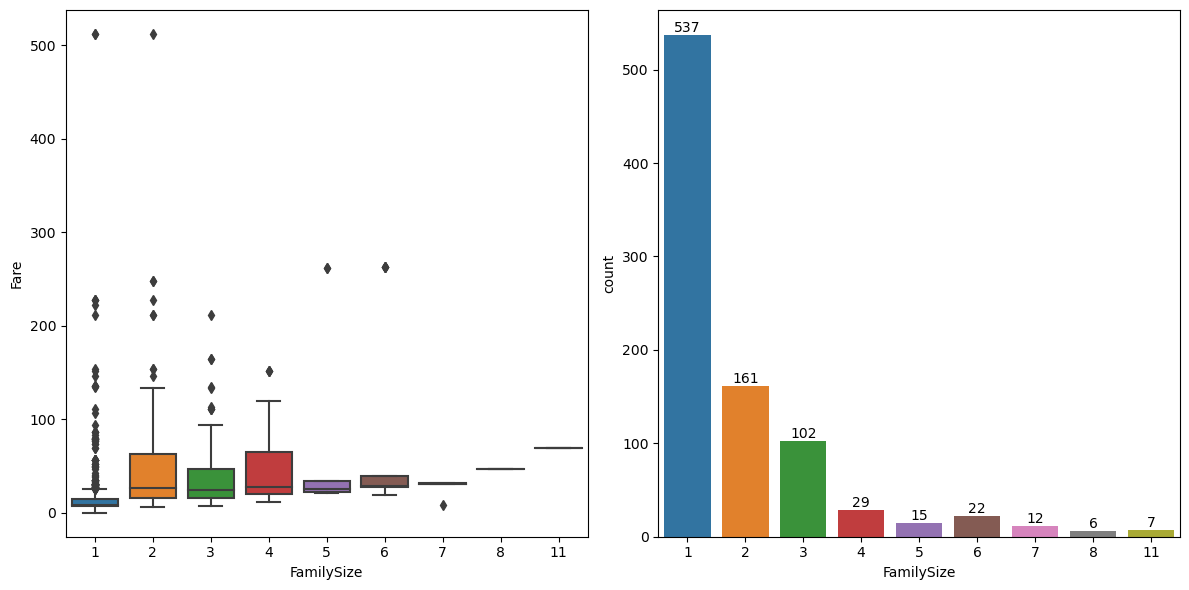

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df, x='FamilySize', y='Fare', ax=fig.axes[0])

# plt.show()
ax = sns.countplot(data=df, x='FamilySize', ax=fig.axes[1])        
for i in ax.containers:
    ax.bar_label(i, )
fig.tight_layout()



## Task 5
**Description:** Is there any effect caused by sex on survival rate?

**Insight gained:** We see that many more men did not survived and the survival rates for women are higher. This is simply explainable by evacuating women first from the sinking ship.

<AxesSubplot: xlabel='Survived', ylabel='Sex'>

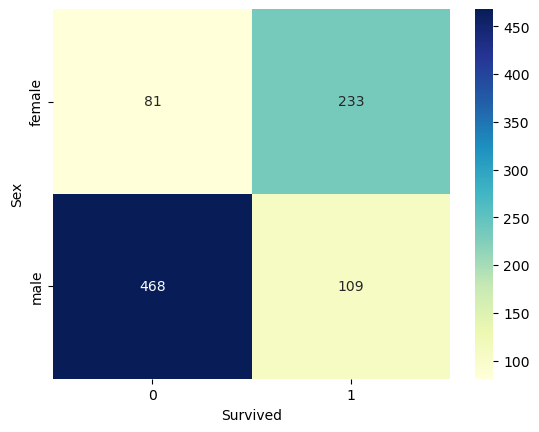

In [164]:
df_agg=df.groupby(['Sex', 'Survived']).PassengerId.count().reset_index(name='count')
df_agg

sns.heatmap(data=df_agg.pivot(index='Sex', columns='Survived', values='count'), cmap='YlGnBu', annot=True, fmt='d')

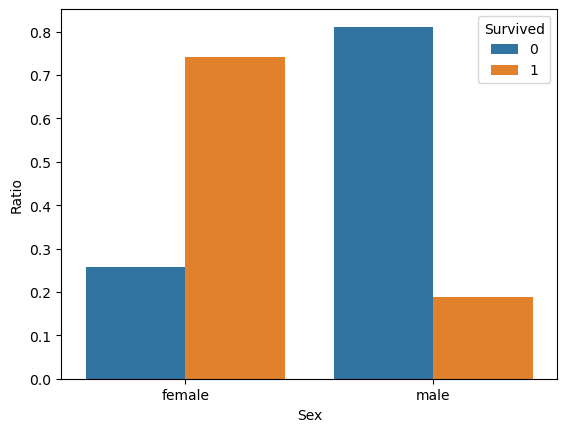

In [171]:
df_agg= (df.groupby(['Sex', 'Survived']).PassengerId.count() / df.groupby('Sex').Survived.count()).reset_index(name='Ratio')
df_agg
ax = sns.barplot(data=df_agg, x='Sex', y='Ratio', hue='Survived')

## Task 6

**Description:** Is there any effect of ticket price based on embarkment?
C = Cherbourg, Q = Queenstown, S = Southampton
**Insight gained:** It is noticable that in the port of Southampton, where most people embarked, were the ticket prices the lowest across each class. There not much data available for Queenstown, is seems that people embarking in Charbourg port paid the most for their tickets.  

<AxesSubplot: xlabel='Embarked', ylabel='count'>

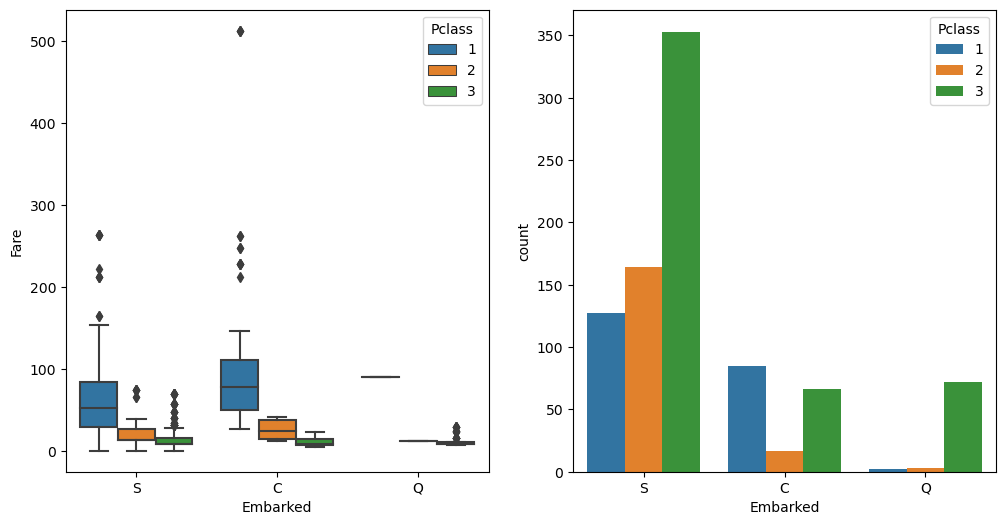

In [179]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df, x='Embarked', y='Fare', hue='Pclass', ax=axes[0])
sns.countplot(data=df, x='Embarked', hue='Pclass', ax=axes[1])

<AxesSubplot: title={'center': 'Median fare for each port and class'}, xlabel='Pclass', ylabel='Embarked'>

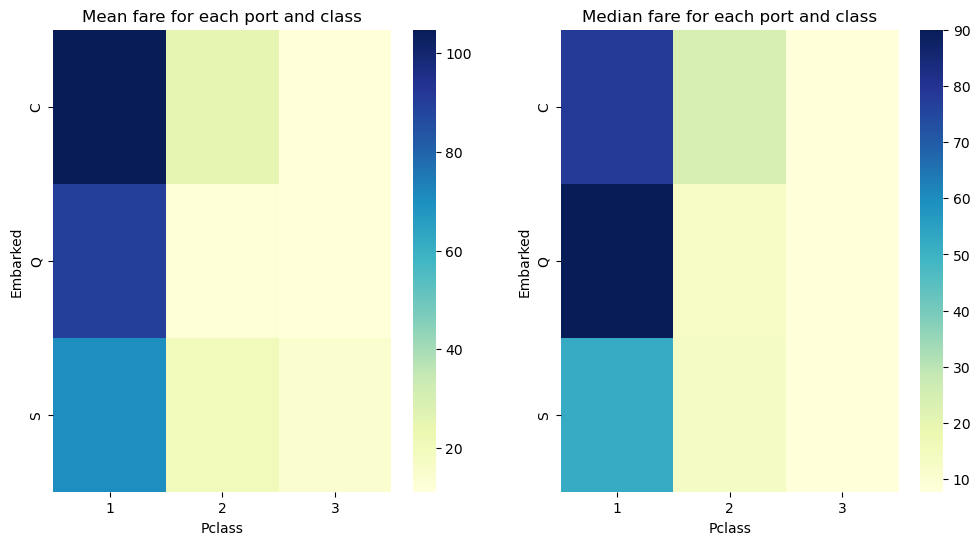

In [204]:
df_agg = df.groupby(['Embarked', 'Pclass']).Fare.agg(['mean', 'median', 'count']).reset_index()
df_agg.pivot(index='Embarked', columns='Pclass', values='mean')

fix, axes = plt.subplots(1, 2, figsize=(12, 6))

ax = sns.heatmap(data=df_agg.pivot(index='Embarked', columns='Pclass', values='mean'), cmap='YlGnBu', ax=axes[0])
ax.set(title='Mean fare for each port and class')
plt.title('Median fare for each port and class')
sns.heatmap(data=df_agg.pivot(index='Embarked', columns='Pclass', values='median'), cmap='YlGnBu', ax=axes[1])

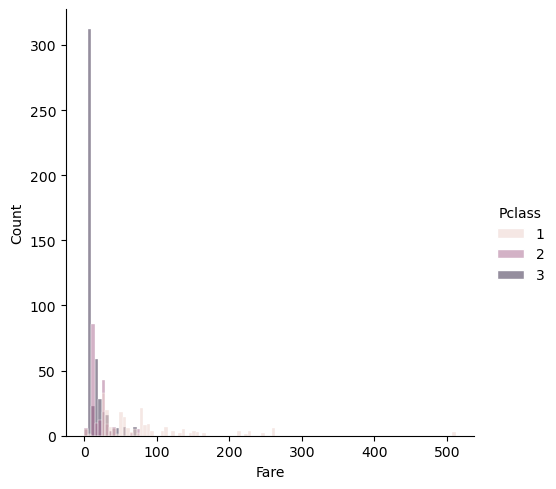

In [194]:
sns.displot(data=df, x='Fare', hue='Pclass', edgecolor='white')